In [ ]:
from datasets import load_dataset
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
dataset = load_dataset('squad')
train_dataset, validation_dataset = dataset['train'], dataset['validation']

In [ ]:
len(train_dataset)

In [ ]:
len(validation_dataset)

In [ ]:
len(train_dataset) + len(validation_dataset)

In [ ]:
train_dataset[0]

In [ ]:
missing_titles = 0
missing_contexts = 0
missing_questions = 0
missing_answers = 0

for ds in [train_dataset, validation_dataset]:
    for element in ds:
    
        if element['title'] is None:
            missing_titles += 1

        if element['context'] is None:
            missing_contexts += 1

        if element['question'] is None:
            missing_questions += 1
        
        if element['answers'] is None:
            missing_answers += 1

print(f'Missing Titles: {missing_titles}\nMissing Contexts: {missing_contexts}\nMissing Questions: {missing_questions}\nMissing Answers: {missing_answers}')

In [ ]:
temp_dict = {}

for element in train_dataset:
    title = element['title']
    if title in temp_dict:
        temp_dict[title].append(element)
    else:
        temp_dict[title] = [element]

len(temp_dict)

In [43]:
elements_per_title = {}
for key, value in temp_dict.items():
    elements_per_title[key] = len(value)

min(elements_per_title.values()), max(elements_per_title.values())

(22, 817)

In [44]:
# Calculate average of data entries per Title
sum(elements_per_title.values()) / len(elements_per_title.values())

198.18778280542986

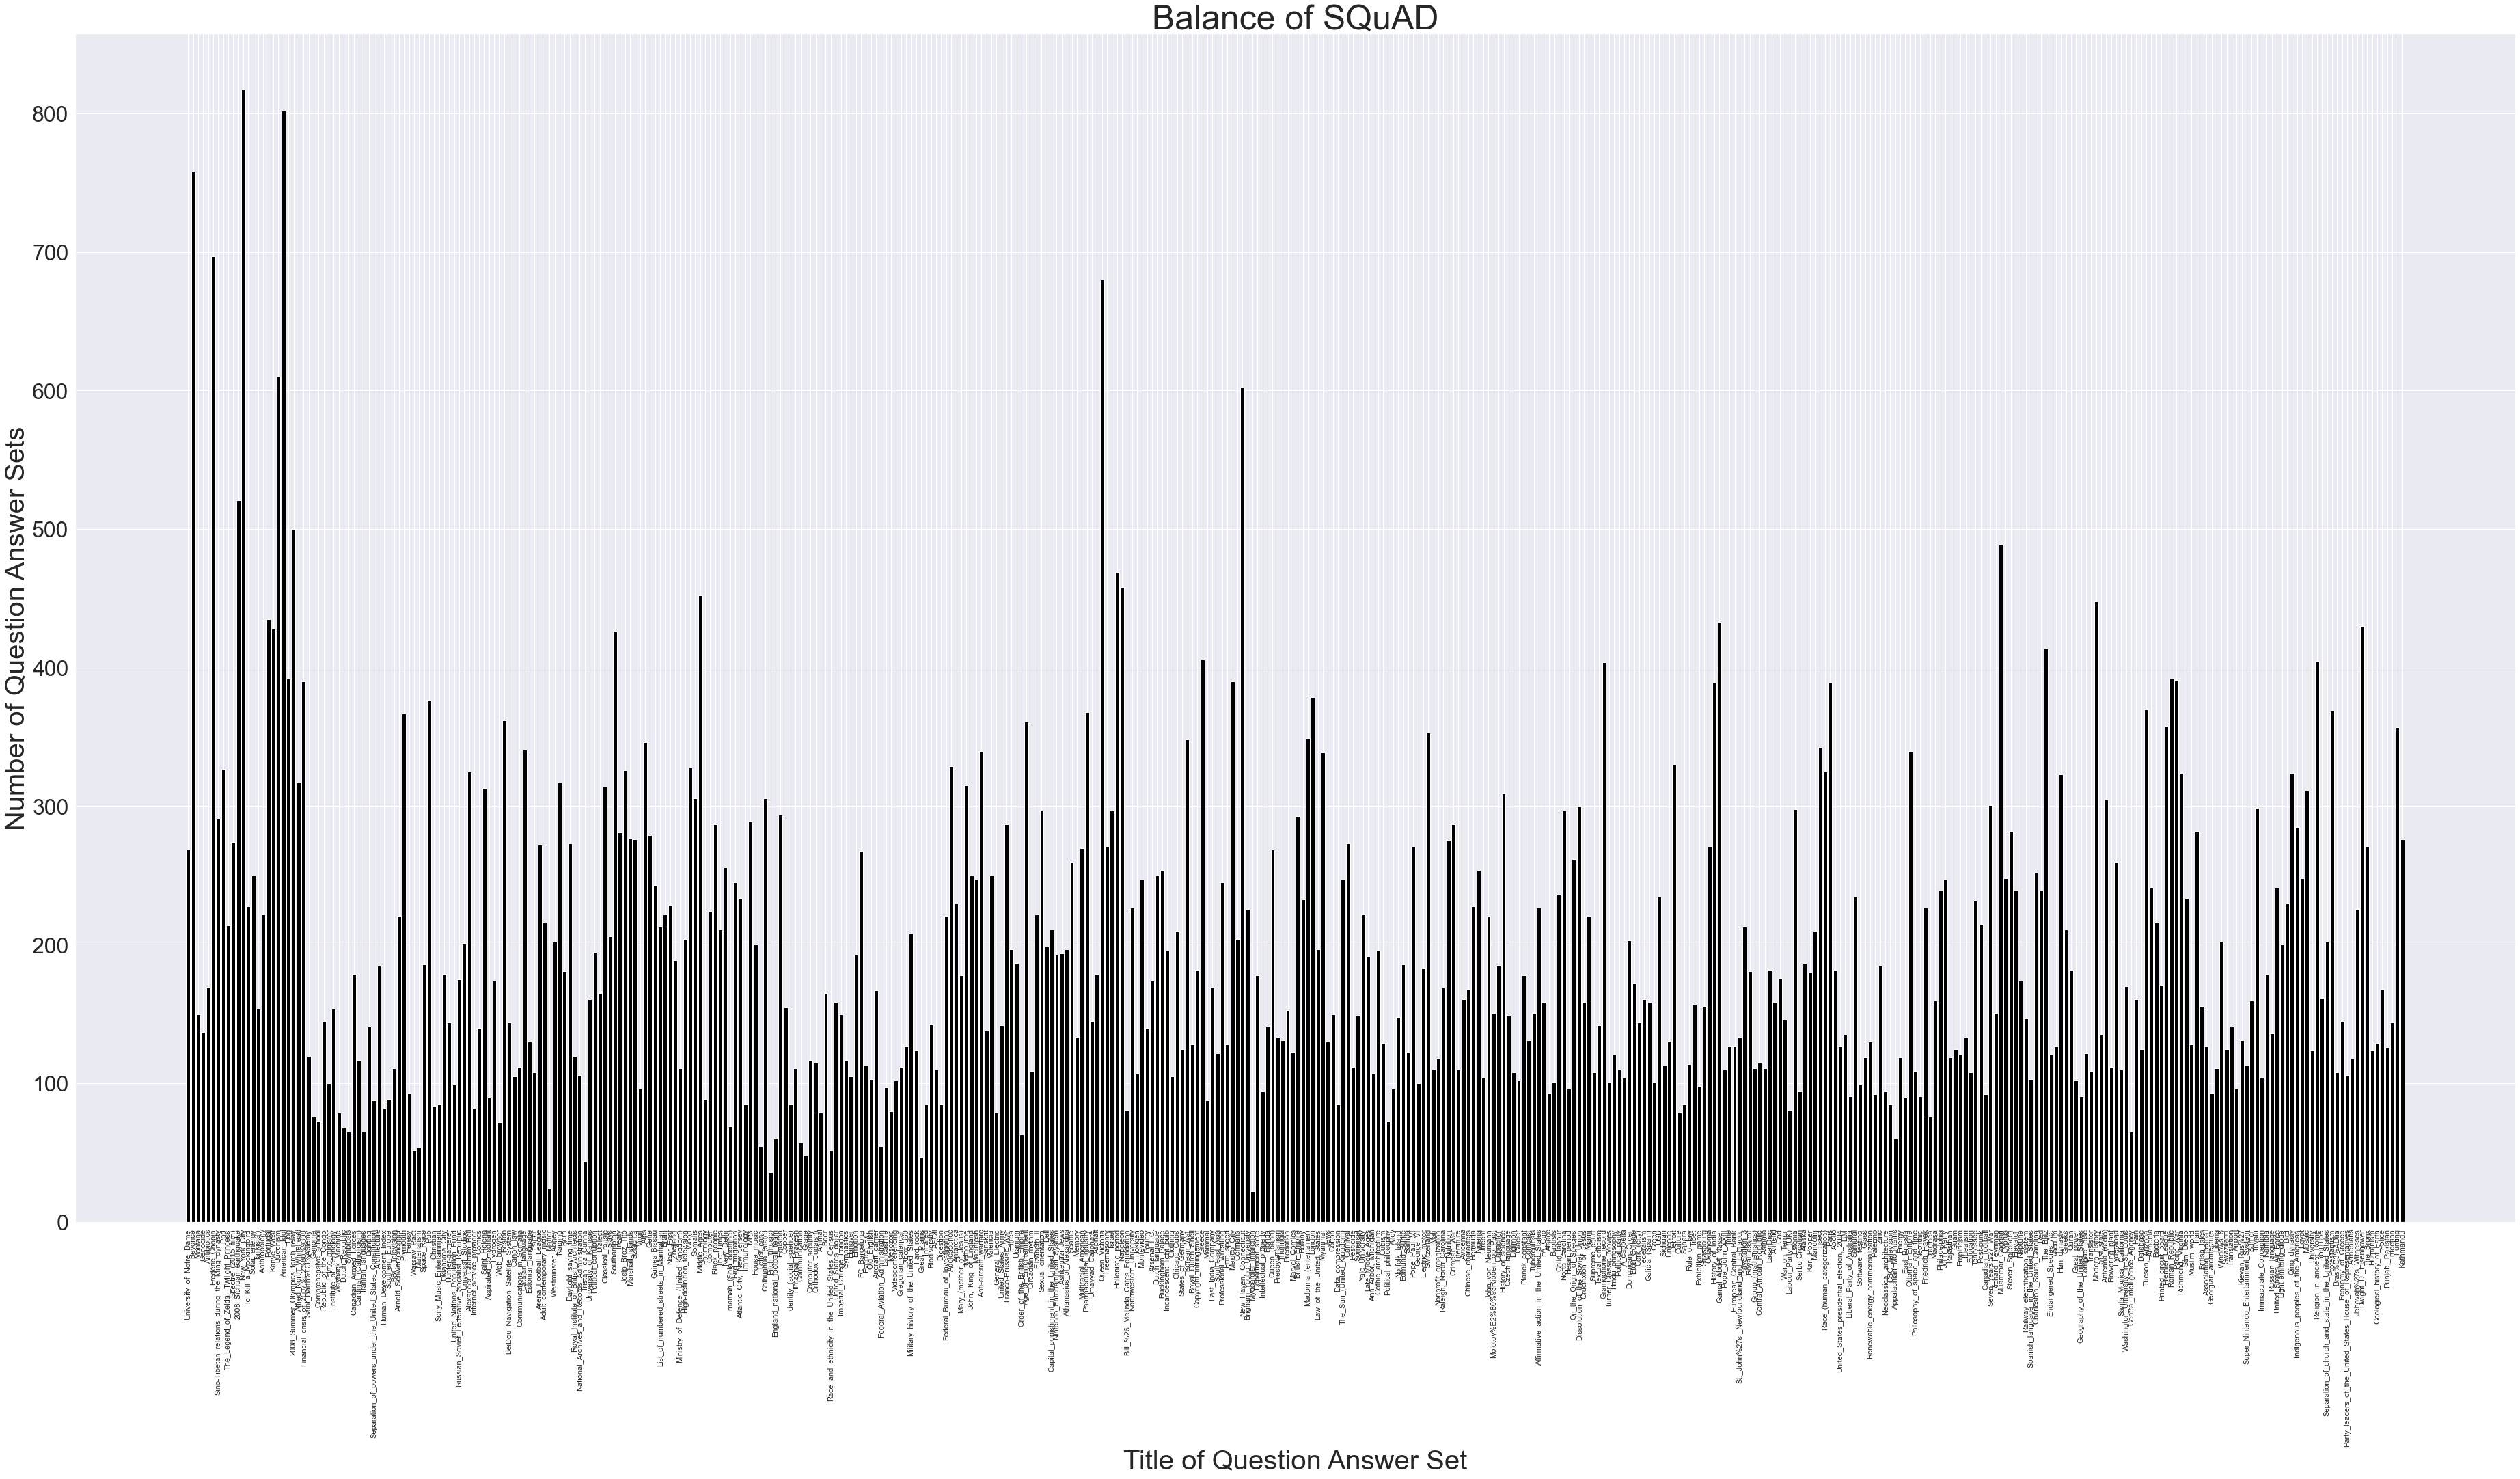

In [42]:
color_map = plt.get_cmap('tab20c')
plt.rcParams['figure.figsize'] = (64, 32)
plt.bar(elements_per_title.keys(), elements_per_title.values(), color='black')
plt.title('Balance of SQuAD', fontsize=50)
plt.xlabel('Title of Question Answer Set', fontsize=40)
plt.xticks(rotation=90)
plt.yticks(fontsize=32)
plt.ylabel('Number of Question Answer Sets', fontsize=40)
plt.show()

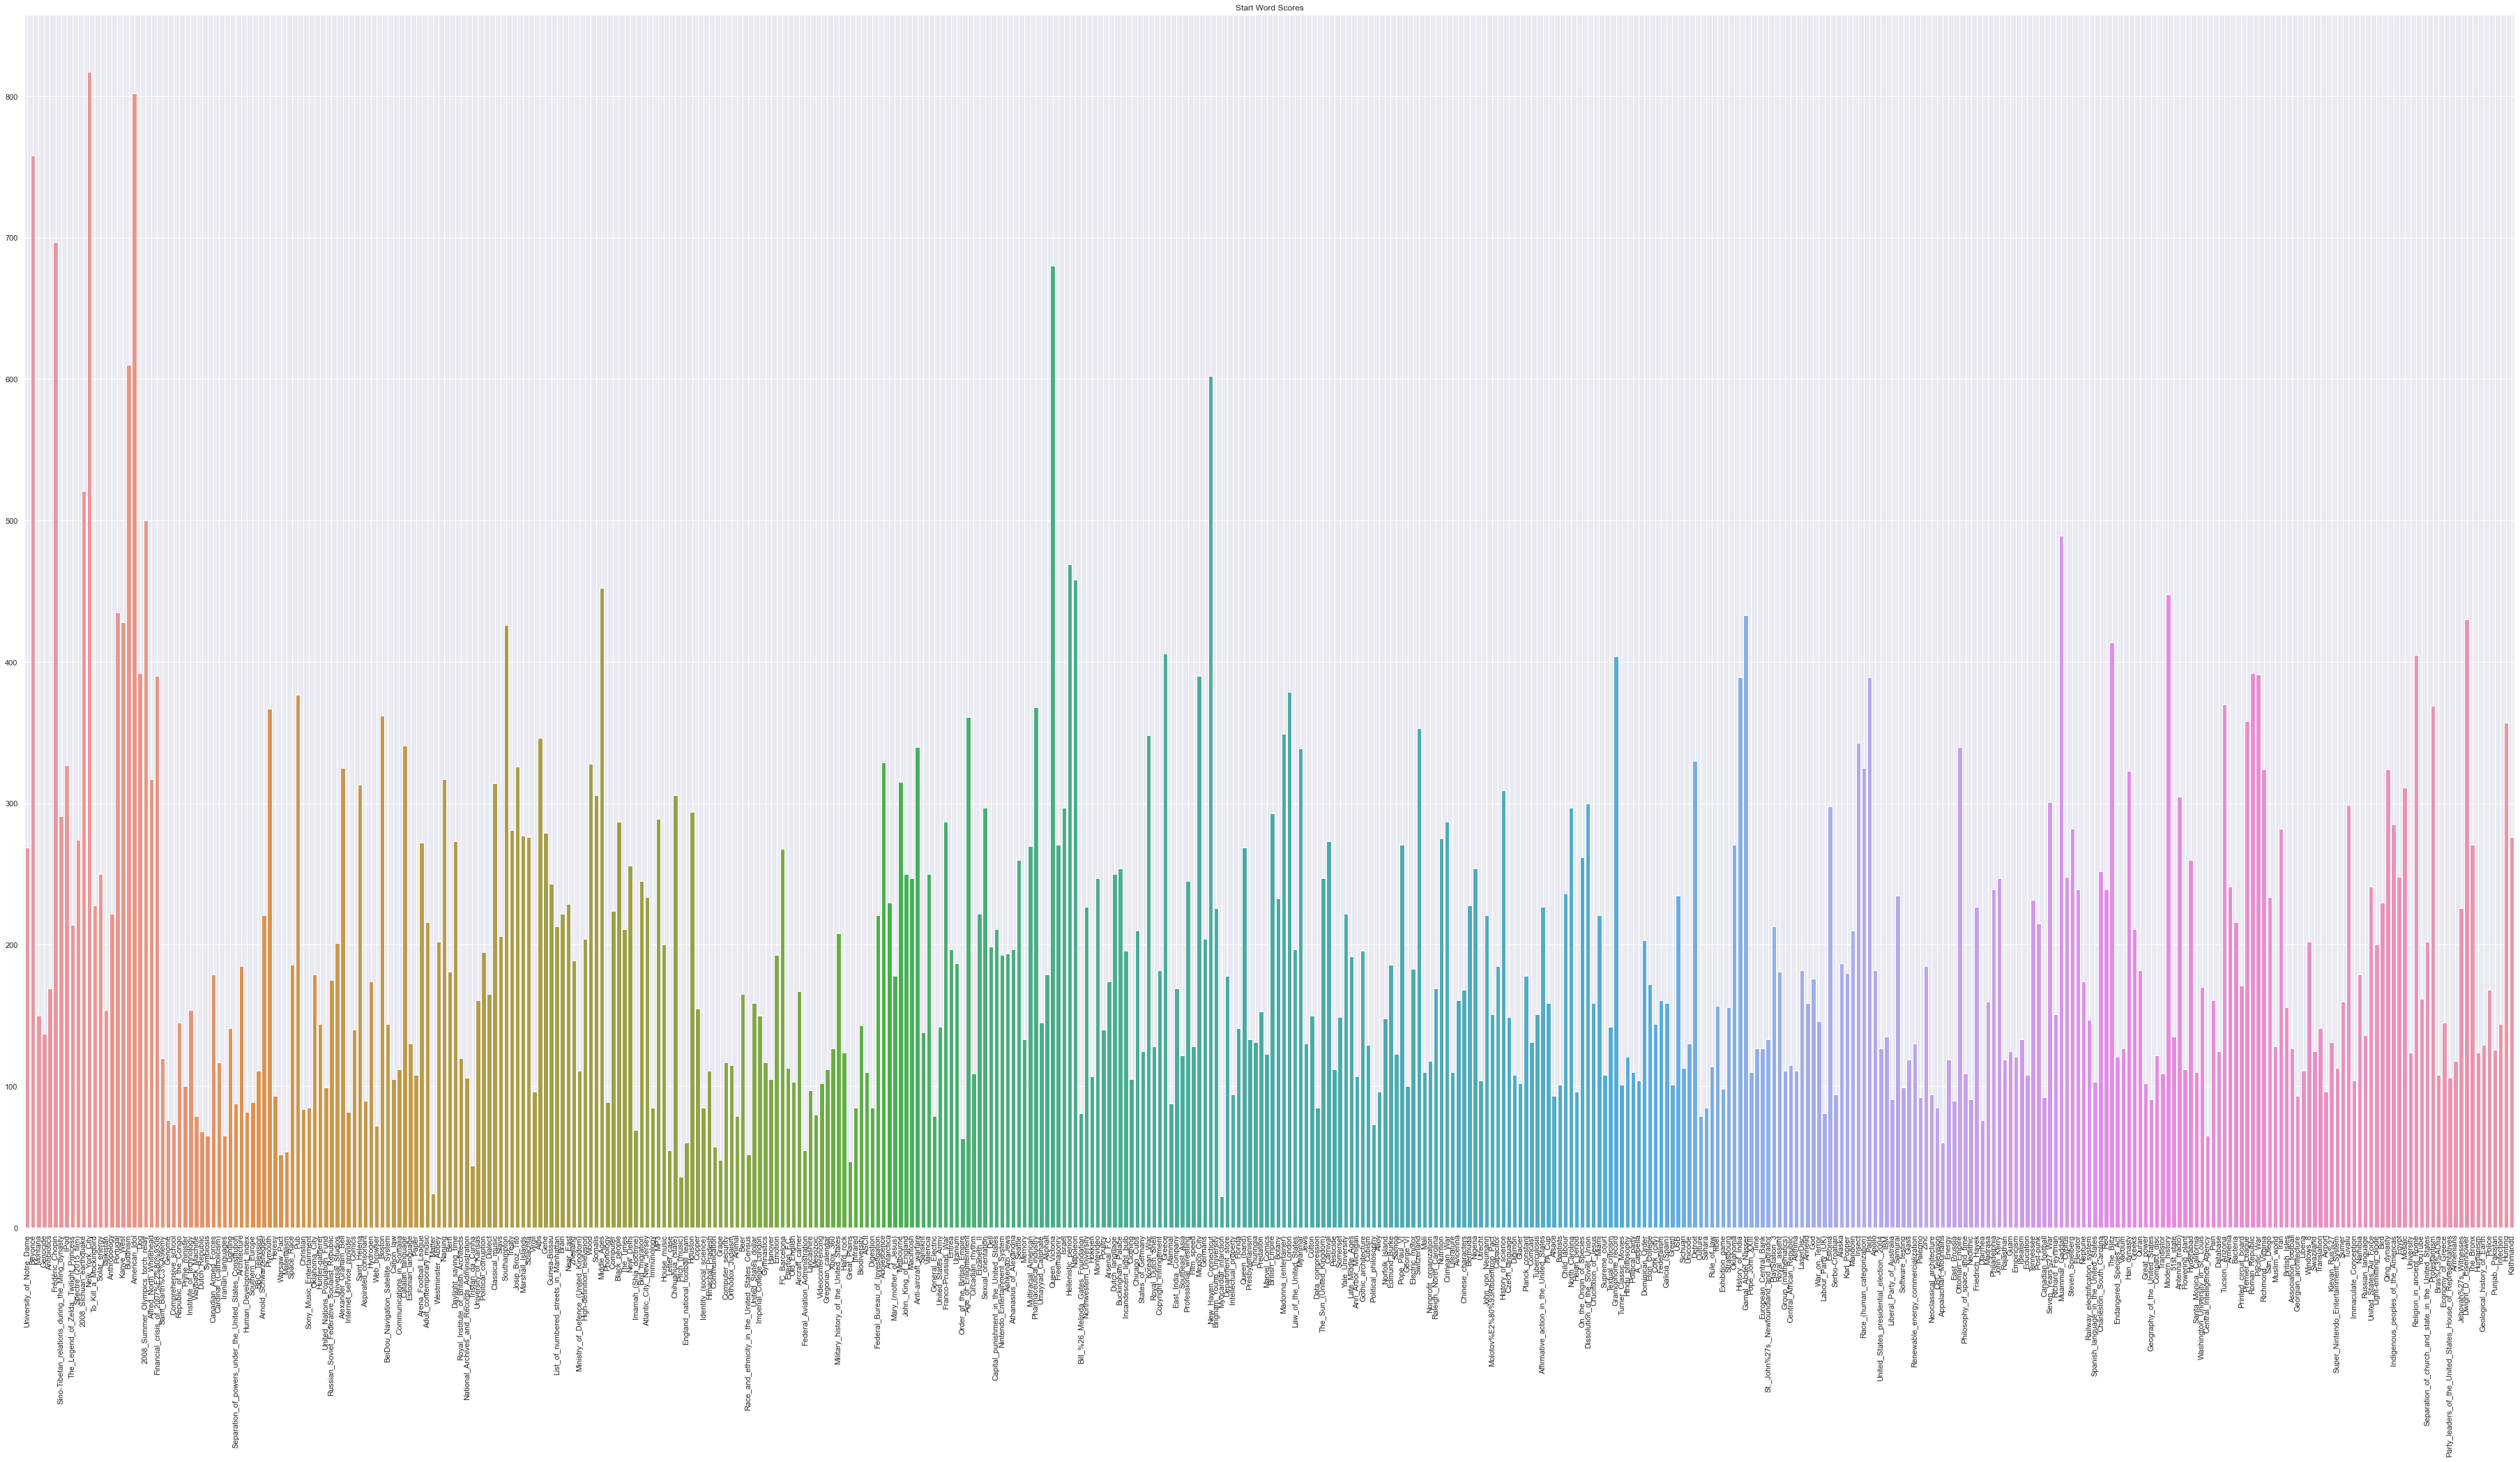

In [50]:
keys = list(elements_per_title.keys())
values = list(elements_per_title.values())

# Create a barplot showing the start word score for all of the tokens
ax = sns.barplot(x=keys, y=values, ci=None)

# Turn the xlabels vertical
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha='center')

# Turn on the vertical grid to help align words to scores
ax.grid(True)

plt.title('Start Word Scores')

plt.show()

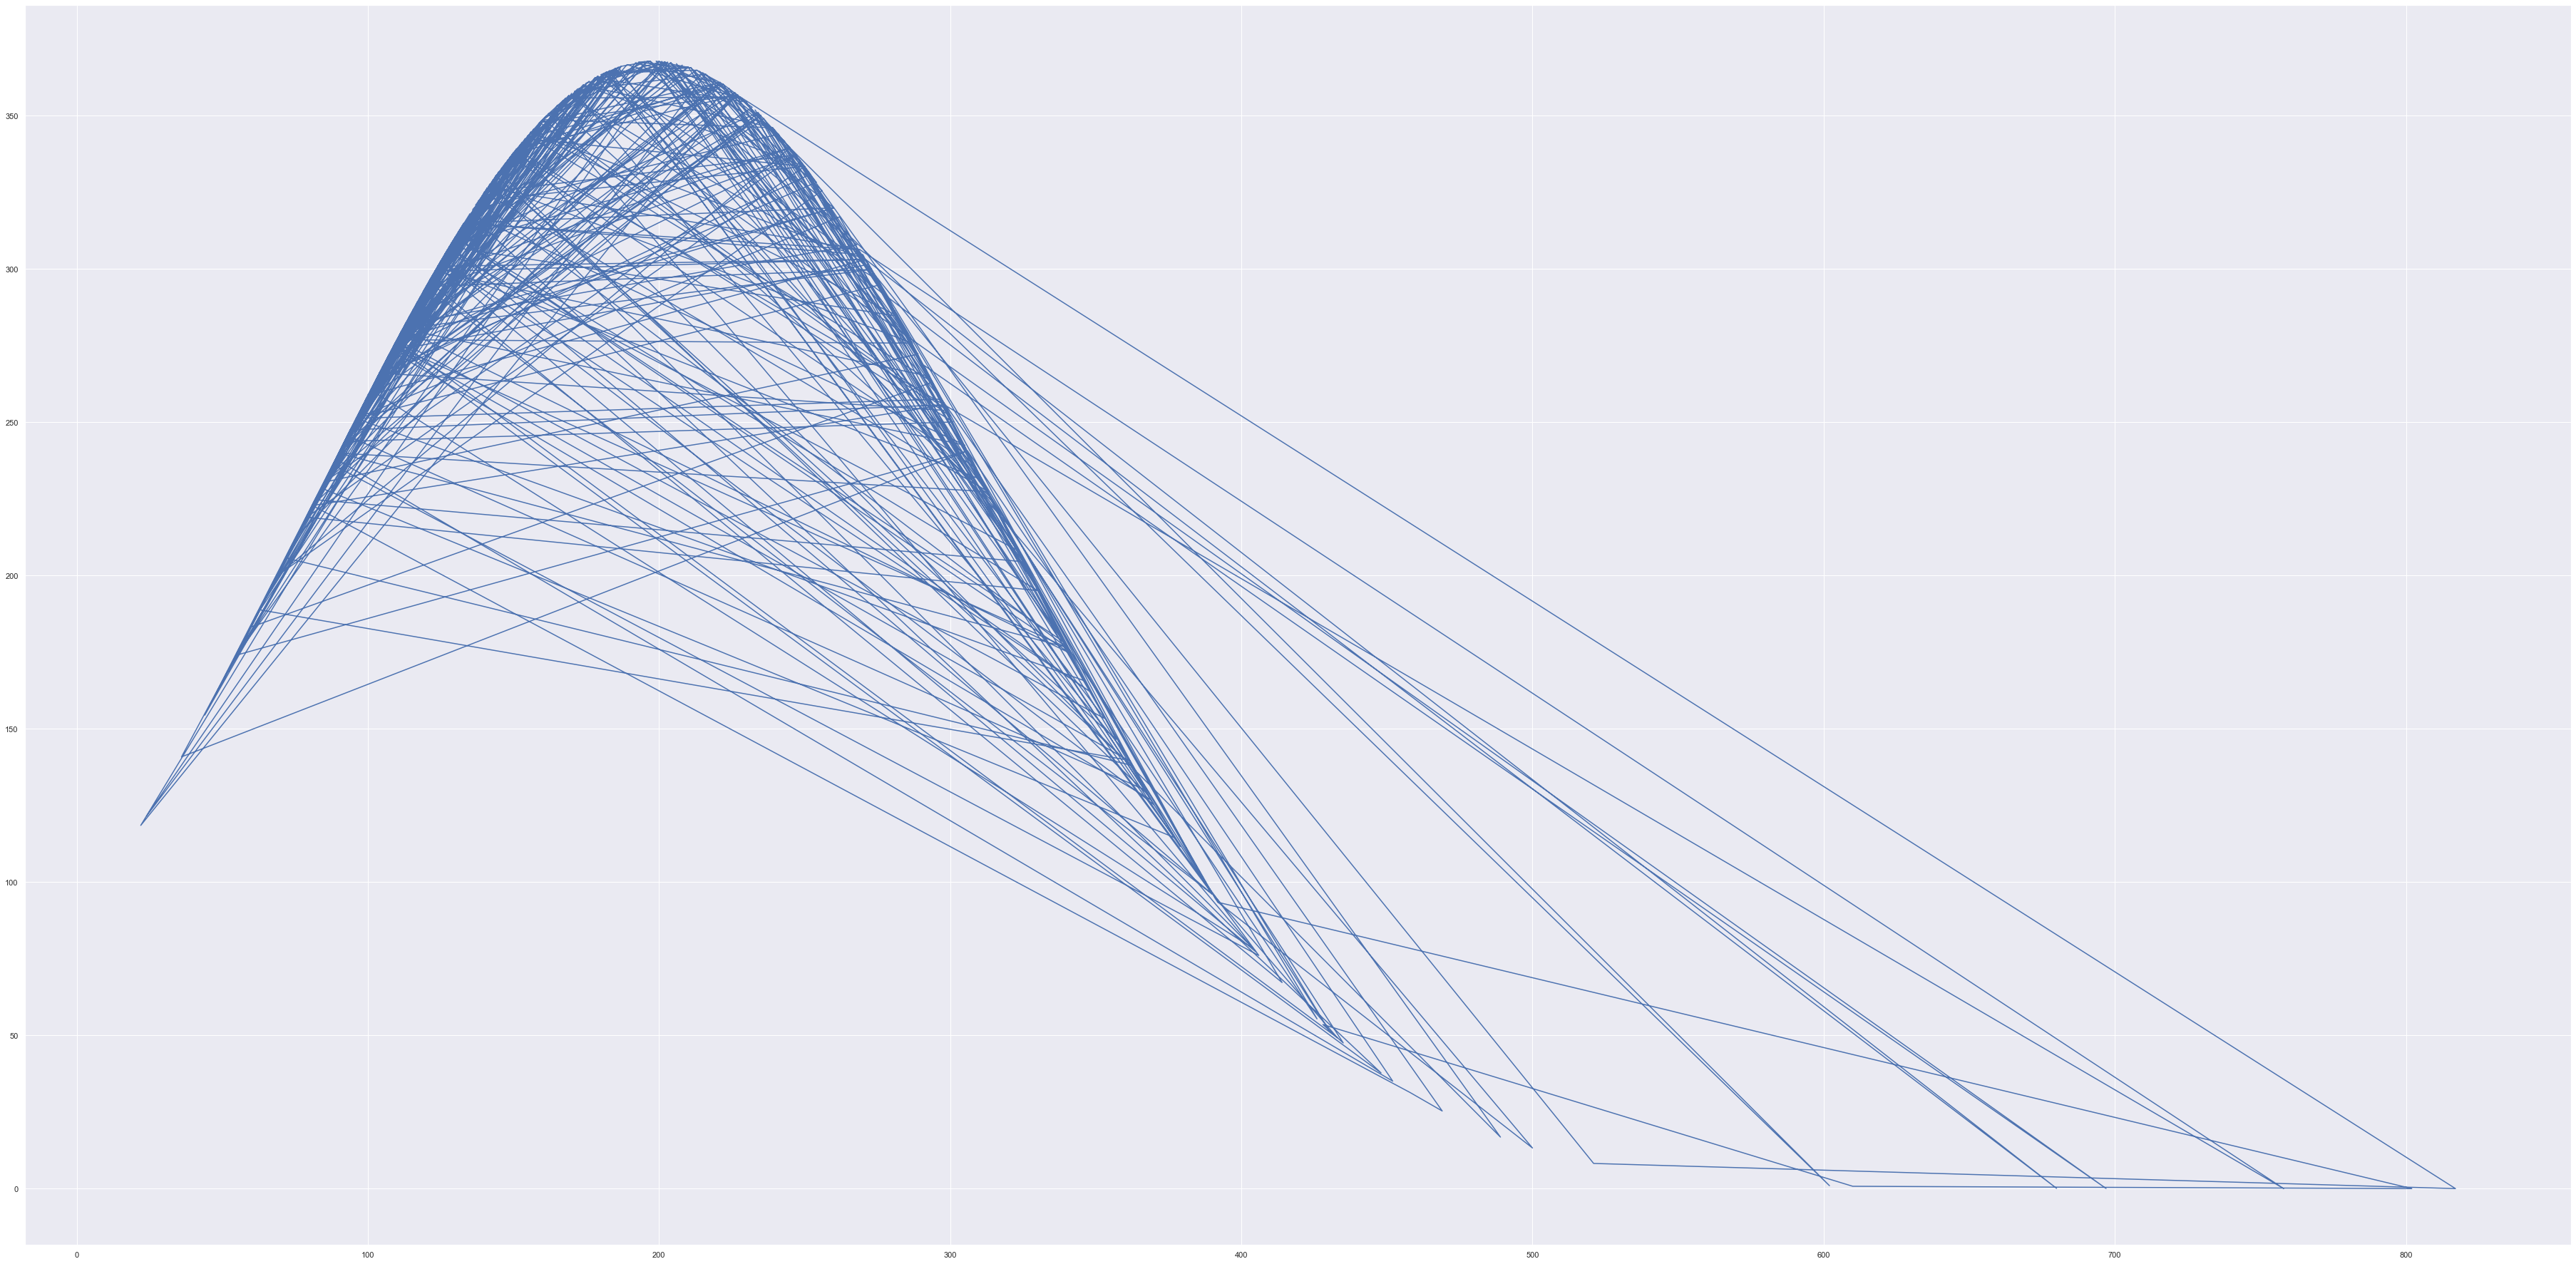

In [53]:
import numpy as np


def normal_dist(x , mean , sd):
    prob_density = (np.pi*sd) * np.exp(-0.5*((x-mean)/sd)**2)
    return prob_density

mean = np.mean(values)
std = np.std(values)

norm_df = normal_dist(values, mean, std)

sorted(values)

plt.plot(values, norm_df)
plt.show()


array([ 1.        ,  1.24623116,  1.49246231,  1.73869347,  1.98492462,
        2.23115578,  2.47738693,  2.72361809,  2.96984925,  3.2160804 ,
        3.46231156,  3.70854271,  3.95477387,  4.20100503,  4.44723618,
        4.69346734,  4.93969849,  5.18592965,  5.4321608 ,  5.67839196,
        5.92462312,  6.17085427,  6.41708543,  6.66331658,  6.90954774,
        7.15577889,  7.40201005,  7.64824121,  7.89447236,  8.14070352,
        8.38693467,  8.63316583,  8.87939698,  9.12562814,  9.3718593 ,
        9.61809045,  9.86432161, 10.11055276, 10.35678392, 10.60301508,
       10.84924623, 11.09547739, 11.34170854, 11.5879397 , 11.83417085,
       12.08040201, 12.32663317, 12.57286432, 12.81909548, 13.06532663,
       13.31155779, 13.55778894, 13.8040201 , 14.05025126, 14.29648241,
       14.54271357, 14.78894472, 15.03517588, 15.28140704, 15.52763819,
       15.77386935, 16.0201005 , 16.26633166, 16.51256281, 16.75879397,
       17.00502513, 17.25125628, 17.49748744, 17.74371859, 17.98